In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

Getting a first look at our data

In [6]:
transaction_data = pd.read_excel('../data/QVI_transaction_data.xlsx')
transaction_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [7]:
purchase_data = pd.read_csv('../data/QVI_purchase_behaviour.csv')
purchase_data.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


We see for transaction data we've got:
- Date
- Store number
- Loyalty card number
- txn_id ??
- Product number
- Product name
- Product quantity
- Total sales

And for purchase data:
- Loyalty card number
- Lifestage
- Premium customer category

Null checks, describe data and .info()

In [8]:
transaction_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


So DATE is an int64 - we probs want datetime

In [9]:
transaction_data.describe()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264836.000000,264836.00000,2.648360e+05,2.648360e+05,264836.000000,264836.000000,264836.000000
mean,43464.036260,135.08011,1.355495e+05,1.351583e+05,56.583157,1.907309,7.304200
std,105.389282,76.78418,8.057998e+04,7.813303e+04,32.826638,0.643654,3.083226
min,43282.000000,1.00000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,43373.000000,70.00000,7.002100e+04,6.760150e+04,28.000000,2.000000,5.400000
50%,43464.000000,130.00000,1.303575e+05,1.351375e+05,56.000000,2.000000,7.400000
75%,43555.000000,203.00000,2.030942e+05,2.027012e+05,85.000000,2.000000,9.200000
max,43646.000000,272.00000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000


In [10]:
transaction_data.isnull().sum()

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64

Purchase data same checks

In [11]:
purchase_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [12]:
purchase_data.describe()

,LYLTY_CARD_NBR
count,7.263700e+04
mean,1.361859e+05
std,8.989293e+04
min,1.000000e+03
25%,6.620200e+04
50%,1.340400e+05
75%,2.033750e+05
max,2.373711e+06


In [13]:
purchase_data.isnull().sum()

LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

Mostly all good with the purchase data

Let's change the date in transaction data to datetime.

Since this was a dataset imported from Excel, a quick search for what the date column might mean, we can see that Excel dates start from December 30 1899. The dates in the data currently are just days since that start date so we can take the time delta from the start date and the number that's currently shown.

In [14]:
# converting date column to datetime format
# excel dates start from 1899-12-30
from datetime import datetime

def convert_excel_date_to_pandas(df, date_col):
    for i in range(len(df)):
        excel_date = df.loc[i, date_col]
        dt = datetime.fromordinal(datetime(1900, 1, 1).toordinal() + int(excel_date) - 2)
        df.loc[i, date_col] = dt.strftime("%Y-%m-%d")
    return df

transaction_data = convert_excel_date_to_pandas(transaction_data, 'DATE')

In [15]:
transaction_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


Looking at the product names now. Seems like we've got the description of the kind of chip brand/flavour and then the weight of the product

In [16]:
transaction_data["PROD_NAME"].unique()

array(['Natural Chip        Compny SeaSalt175g',
       'CCs Nacho Cheese    175g',
       'Smiths Crinkle Cut  Chips Chicken 170g',
       'Smiths Chip Thinly  S/Cream&Onion 175g',
       'Kettle Tortilla ChpsHny&Jlpno Chili 150g',
       'Old El Paso Salsa   Dip Tomato Mild 300g',
       'Smiths Crinkle Chips Salt & Vinegar 330g',
       'Grain Waves         Sweet Chilli 210g',
       'Doritos Corn Chip Mexican Jalapeno 150g',
       'Grain Waves Sour    Cream&Chives 210G',
       'Kettle Sensations   Siracha Lime 150g',
       'Twisties Cheese     270g', 'WW Crinkle Cut      Chicken 175g',
       'Thins Chips Light&  Tangy 175g', 'CCs Original 175g',
       'Burger Rings 220g', 'NCC Sour Cream &    Garden Chives 175g',
       'Doritos Corn Chip Southern Chicken 150g',
       'Cheezels Cheese Box 125g', 'Smiths Crinkle      Original 330g',
       'Infzns Crn Crnchers Tangy Gcamole 110g',
       'Kettle Sea Salt     And Vinegar 175g',
       'Smiths Chip Thinly  Cut Original 175g', 'K

We see the names are kind of split, making it easy for us to read the brand first, then the flavour and then the weight.

Is there any way that we can check if the product name column has a snack that isn't chips?

In [17]:
process_name = lambda name: ' '.join([word.replace('&', '') for word in name.split() if not word.isdigit()]).replace('g', '')

transaction_data['PROD_NAME'] = transaction_data['PROD_NAME'].apply(process_name)

word_counts = {}
for row in transaction_data['PROD_NAME']:
    for word in row.split():
        if word in word_counts:
            word_counts[word] += 1
        else:
            word_counts[word] = 1

sorted_counts = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)

for word, count in sorted_counts:
    print(f"{word}: {count}")

175: 60561
Chips: 49770
150: 41633
Kettle: 41288
Smiths: 28860
Salt: 27976
Cheese: 27890
Prinles: 25102
134: 25102
Doritos: 24962
Crinkle: 23960
110: 22387
Corn: 22063
Oriinal: 21560
Cut: 20754
Chip: 18645
170: 18502
Salsa: 18094
Chicken: 15407
165: 15297
Sea: 14145
Thins: 14075
Chilli: 13895
Sour: 13882
Crisps: 12607
330: 12540
Vinear: 12402
300: 12041
RRD: 11894
Infuzions: 11057
Supreme: 10963
WW: 10320
Cobs: 9693
Popd: 9693
Tortilla: 9580
Tostitos: 9471
Twisties: 9454
Sensations: 9429
Old: 9324
El: 9324
Paso: 9324
Dip: 9324
Sweet: 7883
Lime: 7852
Chives: 7846
Tomato: 7669
Cream: 7618
Thinly: 7507
Tyrrells: 6442
380: 6418
And: 6373
BBQ: 6351
Tany: 6332
Grain: 6272
Waves: 6272
Lihtly: 6248
Salted: 6248
Soy: 6121
Natural: 6050
Mild: 6048
Red: 5885
Rock: 5885
Deli: 5885
Thai: 4737
Burer: 4733
Swt: 4718
Honey: 4661
Nacho: 4658
Potato: 4647
Cheezels: 4603
CCs: 4551
200: 4473
Woolworths: 4437
Mozzarella: 3304
Basil: 3304
Pesto: 3304
ChpsHnyJlpno: 3296
Chili: 3296
Swt/Chlli: 3269
Sr/Cream: 

In [18]:
len(sorted_counts)

217

In [19]:
# remove salsa whether it is in caps or not
transaction_data = transaction_data[~transaction_data['PROD_NAME'].str.contains('SALSA', case=False)]

transaction_data['PROD_NAME'].unique()

array(['Natural Chip Compny SeaSalt175', 'CCs Nacho Cheese 175',
       'Smiths Crinkle Cut Chips Chicken 170',
       'Smiths Chip Thinly S/CreamOnion 175',
       'Kettle Tortilla ChpsHnyJlpno Chili 150',
       'Smiths Crinkle Chips Salt  Vinear 330',
       'Grain Waves Sweet Chilli 210',
       'Doritos Corn Chip Mexican Jalapeno 150',
       'Grain Waves Sour CreamChives 210G',
       'Kettle Sensations Siracha Lime 150', 'Twisties Cheese 270',
       'WW Crinkle Cut Chicken 175', 'Thins Chips Liht Tany 175',
       'CCs Oriinal 175', 'Burer Rins 220',
       'NCC Sour Cream  Garden Chives 175',
       'Doritos Corn Chip Southern Chicken 150',
       'Cheezels Cheese Box 125', 'Smiths Crinkle Oriinal 330',
       'Infzns Crn Crnchers Tany Gcamole 110',
       'Kettle Sea Salt And Vinear 175',
       'Smiths Chip Thinly Cut Oriinal 175', 'Kettle Oriinal 175',
       'Red Rock Deli Thai ChilliLime 150',
       'Prinles Sthrn FriedChicken 134', 'Prinles SweetSpcy BBQ 134',
       'T

In [20]:
# count the words again
word_counts = {}
for row in transaction_data['PROD_NAME']:
    for word in row.split():
        if word in word_counts:
            word_counts[word] += 1
        else:
            word_counts[word] = 1

sorted_counts = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)

for word, count in sorted_counts:
    print(f"{word}: {count}")

175: 60561
Chips: 49770
Kettle: 41288
150: 38705
Salt: 27976
Cheese: 27890
Smiths: 27390
Prinles: 25102
134: 25102
Crinkle: 22490
110: 22387
Corn: 22063
Doritos: 22041
Oriinal: 21560
Cut: 19284
Chip: 18645
170: 18502
Chicken: 15407
165: 15297
Sea: 14145
Thins: 14075
Chilli: 13895
Sour: 13882
Crisps: 12607
330: 12540
Vinear: 12402
RRD: 11894
Infuzions: 11057
Supreme: 10963
WW: 10320
Cobs: 9693
Popd: 9693
Tortilla: 9580
Tostitos: 9471
Twisties: 9454
Sensations: 9429
Sweet: 7883
Lime: 7852
Chives: 7846
Cream: 7618
Thinly: 7507
Tyrrells: 6442
380: 6418
And: 6373
BBQ: 6351
Tany: 6332
Grain: 6272
Waves: 6272
Lihtly: 6248
Salted: 6248
Soy: 6121
Natural: 6050
Thai: 4737
Burer: 4733
Swt: 4718
Honey: 4661
Nacho: 4658
Potato: 4647
Cheezels: 4603
CCs: 4551
200: 4473
Red: 4427
Rock: 4427
Deli: 4427
Mozzarella: 3304
Basil: 3304
Pesto: 3304
ChpsHnyJlpno: 3296
Chili: 3296
Swt/Chlli: 3269
Sr/Cream: 3269
Ched: 3268
135: 3257
Pot: 3257
Splash: 3252
Of: 3252
SweetChili: 3242
PotatoMix: 3242
Crnkle: 3233
O

In [21]:
len(sorted_counts)

203

We got rid of salsa now. We'll check to see what sort of outliers there are in the dataset

In [22]:
transaction_data.describe()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,246742.000000,2.467420e+05,2.467420e+05,246742.000000,246742.000000,246742.000000
mean,135.051098,1.355310e+05,1.351311e+05,56.351789,1.908062,7.321322
std,76.787096,8.071528e+04,7.814772e+04,33.695428,0.659831,3.077828
min,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.700000
25%,70.000000,7.001500e+04,6.756925e+04,26.000000,2.000000,5.800000
50%,130.000000,1.303670e+05,1.351830e+05,53.000000,2.000000,7.400000
75%,203.000000,2.030840e+05,2.026538e+05,87.000000,2.000000,8.800000
max,272.000000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000


We can see prod quantity max is 200, so someone has boughten 200 chips in one transaction before. Was this a one-off transaction or has it happened multiple times?

In [23]:
transaction_data['PROD_QTY'].value_counts(bins=4).sort_index()

PROD_QTY
(0.8, 50.75]       246740
(50.75, 100.5]          0
(100.5, 150.25]         0
(150.25, 200.0]         2
Name: count, dtype: int64

Someone buying 200 chips has only happened twice, we should check if it was the same customer or 2 separate purchases

In [24]:
# show the loyalty card holder for the purchase of 200 units
transaction_data[transaction_data['PROD_QTY'] == 200]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380,200,650.0
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380,200,650.0


Indeed it was the same customer. What other transactions might they have done?

In [25]:
# what other transactions does this customer have?
transaction_data[transaction_data['LYLTY_CARD_NBR'] == 226000]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380,200,650.0
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380,200,650.0


It's just those two transactions. This could be a commercial purchase for some event but we don't really know that. All we know is that they aren't an ordinary customer dso we can remove their transactions.

In [26]:
transaction_data = transaction_data[transaction_data['LYLTY_CARD_NBR'] != 226000]
transaction_data.describe()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,246740.000000,2.467400e+05,2.467400e+05,246740.000000,246740.000000,246740.000000
mean,135.050361,1.355303e+05,1.351304e+05,56.352213,1.906456,7.316113
std,76.786971,8.071520e+04,7.814760e+04,33.695235,0.342499,2.474897
min,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.700000
25%,70.000000,7.001500e+04,6.756875e+04,26.000000,2.000000,5.800000
50%,130.000000,1.303670e+05,1.351815e+05,53.000000,2.000000,7.400000
75%,203.000000,2.030832e+05,2.026522e+05,87.000000,2.000000,8.800000
max,272.000000,2.373711e+06,2.415841e+06,114.000000,5.000000,29.500000


In [27]:
transaction_data["DATE"].describe()

count         246740
unique           364
top       2018-12-24
freq             865
Name: DATE, dtype: object

We see that there's a missing date when we examine the column. We'll check the range and get the difference between the min and max date and see which date is missing.

In [28]:
pd.date_range(start=transaction_data["DATE"].min(), end=transaction_data["DATE"].max()).difference(transaction_data["DATE"])

DatetimeIndex(['2018-12-25'], dtype='datetime64[ns]', freq=None)

In [29]:
transaction_data["DATE"] = pd.to_datetime(transaction_data["DATE"])

In [30]:
check_null_date = pd.merge(pd.Series(pd.date_range(start=transaction_data["DATE"].min(), end = transaction_data["DATE"].max()), name="DATE"), transaction_data, on="DATE", how="left")

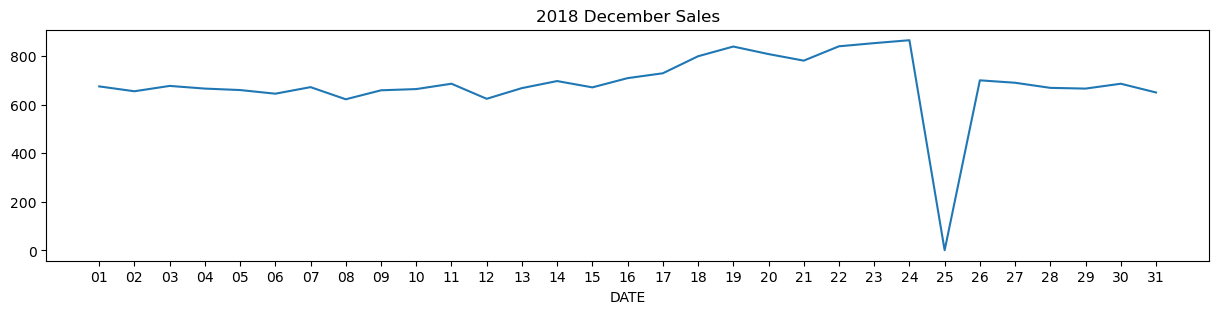

In [31]:
trans_by_date = check_null_date["DATE"].value_counts()
dec = trans_by_date[(trans_by_date.index >= pd.to_datetime('2018-12-01')) & (trans_by_date.index < pd.to_datetime('2019-01-01'))].sort_index()
dec.index = dec.index.strftime('%d')
ax = dec.plot(figsize=(15,3))
ax.set_xticks(np.arange(len(dec)))
ax.set_xticklabels(dec.index)
plt.title("2018 December Sales")
plt.savefig("2018_December_Sales.png", bbox_inches="tight")
plt.show();

In [32]:
check_null_date["DATE"].value_counts().sort_values().head()

DATE
2018-12-25      1
2019-06-13    607
2018-09-22    609
2018-11-25    610
2018-10-18    611
Name: count, dtype: int64

The date with no transaction is Christmas day when the store is most likely closed. This is the only anomaly here so we will leav it be.

We'll look at the chip bag sizes next and see how they differ.

count    246740.000000
mean        175.583521
std          59.432118
min          70.000000
25%         150.000000
50%         170.000000
75%         175.000000
max         380.000000
Name: 0, dtype: float64


<Axes: ylabel='Frequency'>

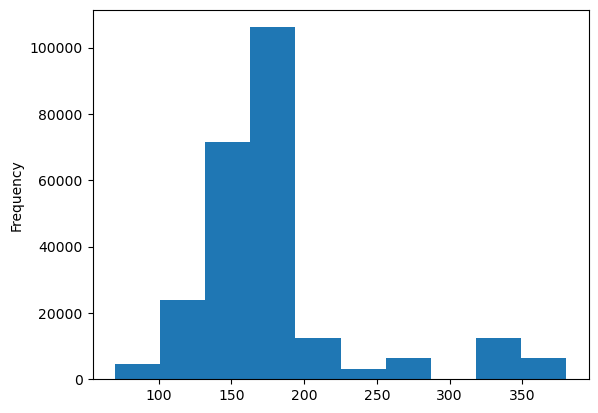

In [33]:
transaction_data["PROD_NAME"] = transaction_data["PROD_NAME"].str.replace(r'[0-9]+(G)', 'g')
pack_sizes = transaction_data["PROD_NAME"].str.extract(r'([0-9]+)g?')[0].astype(float)
print(pack_sizes.describe())
pack_sizes.plot.hist()

No we'll look at the brands of chips that there are. The brands seem to be the first word in the `PROD_NAME` feature, so we'll extract that and get a count of how many transactions are associated with that brand.

In [34]:
transaction_data["PROD_NAME"].str.split().str[0].value_counts().sort_index()

PROD_NAME
Burer          1564
CCs            4551
Cheetos        2927
Cheezels       4603
Cobs           9693
Dorito         3183
Doritos       22041
French         1418
Grain          6272
GrnWves        1468
Infuzions     11057
Infzns         3144
Kettle        41288
NCC            1419
Natural        6050
Prinles       25102
RRD           11894
Red            4427
Smith          2963
Smiths        27390
Snbts          1576
Sunbites       1432
Thins         14075
Tostitos       9471
Twisties       9454
Tyrrells       6442
WW            10320
Woolworths     1516
Name: count, dtype: int64

Something interesting we can point out is that some of the brand names are written in different ways but represent the same brand. Let's pull out the names just like we did before, but then clean them up so they are normalized. We can then get a true count of the brands.

<Axes: ylabel='BRAND'>

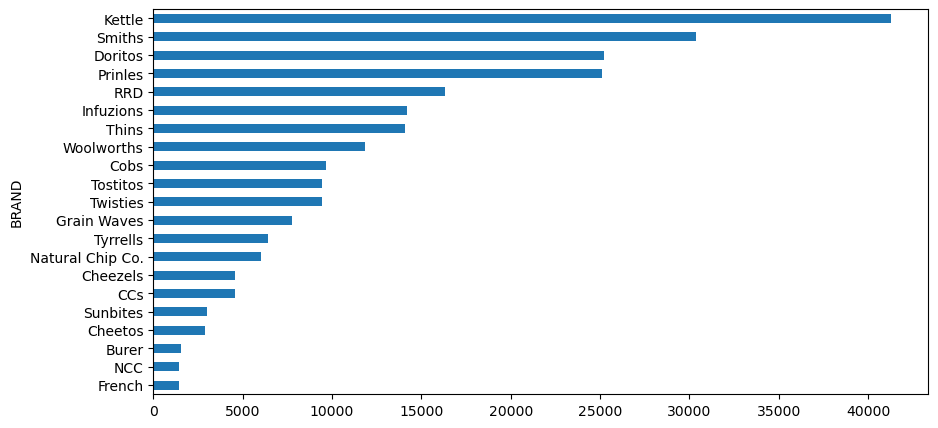

In [35]:
transaction_data["BRAND"] = transaction_data["PROD_NAME"].str.split().str[0]

def clean_brand_name(line):
    brand = line["BRAND"]
    if brand == "Natural":
        return "Natural Chip Co."
    elif brand == "Red":
        return "RRD"
    elif brand == "Dorito":
        return "Doritos"
    elif brand == "GrnWves" or brand == "Grain":
        return "Grain Waves"
    elif brand == "Infzns":
        return "Infuzions"
    elif brand == "Smith":
        return "Smiths"
    elif brand == "Snbts":
        return "Sunbites"
    elif brand == "WW":
        return "Woolworths"
    else:
        return brand
    
transaction_data["BRAND"] = transaction_data.apply(lambda line: clean_brand_name(line), axis=1)

transaction_data["BRAND"].value_counts(ascending=True).plot.barh(figsize=(10,5))

I think we've taken care of the transaction data for now and making sure it's in proper formats so we can start to look at the customer data.

In [36]:
purchase_data.sample(5)

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
62121,234077,YOUNG FAMILIES,Mainstream
70752,265277,OLDER FAMILIES,Budget
5805,21133,YOUNG SINGLES/COUPLES,Mainstream
49946,186435,OLDER SINGLES/COUPLES,Budget
9513,35289,MIDAGE SINGLES/COUPLES,Premium


In [37]:
purchase_data.describe()

,LYLTY_CARD_NBR
count,7.263700e+04
mean,1.361859e+05
std,8.989293e+04
min,1.000000e+03
25%,6.620200e+04
50%,1.340400e+05
75%,2.033750e+05
max,2.373711e+06


In [38]:
purchase_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [39]:
purchase_data['LIFESTAGE'].value_counts()

LIFESTAGE
RETIREES                  14805
OLDER SINGLES/COUPLES     14609
YOUNG SINGLES/COUPLES     14441
OLDER FAMILIES             9780
YOUNG FAMILIES             9178
MIDAGE SINGLES/COUPLES     7275
NEW FAMILIES               2549
Name: count, dtype: int64

<Axes: ylabel='LIFESTAGE'>

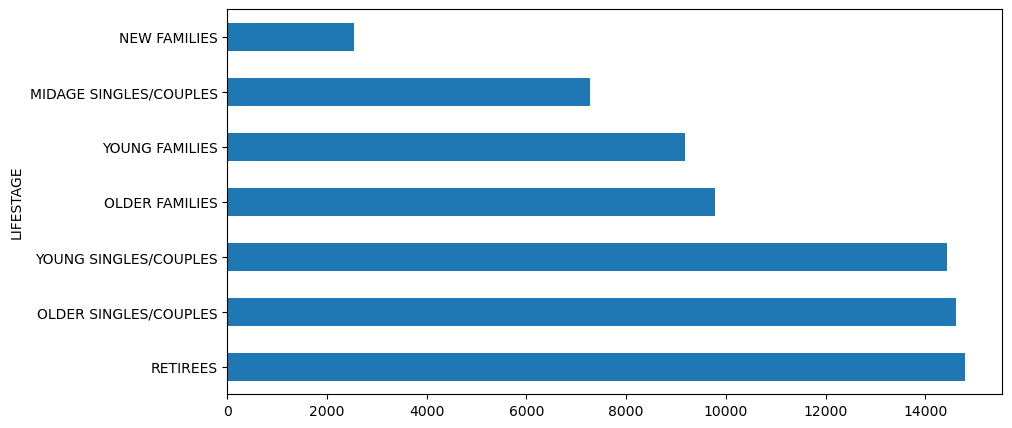

In [40]:
purchase_data['LIFESTAGE'].value_counts().plot.barh(figsize=(10,5))

In [41]:
purchase_data['PREMIUM_CUSTOMER'].value_counts()

PREMIUM_CUSTOMER
Mainstream    29245
Budget        24470
Premium       18922
Name: count, dtype: int64

<Axes: ylabel='PREMIUM_CUSTOMER'>

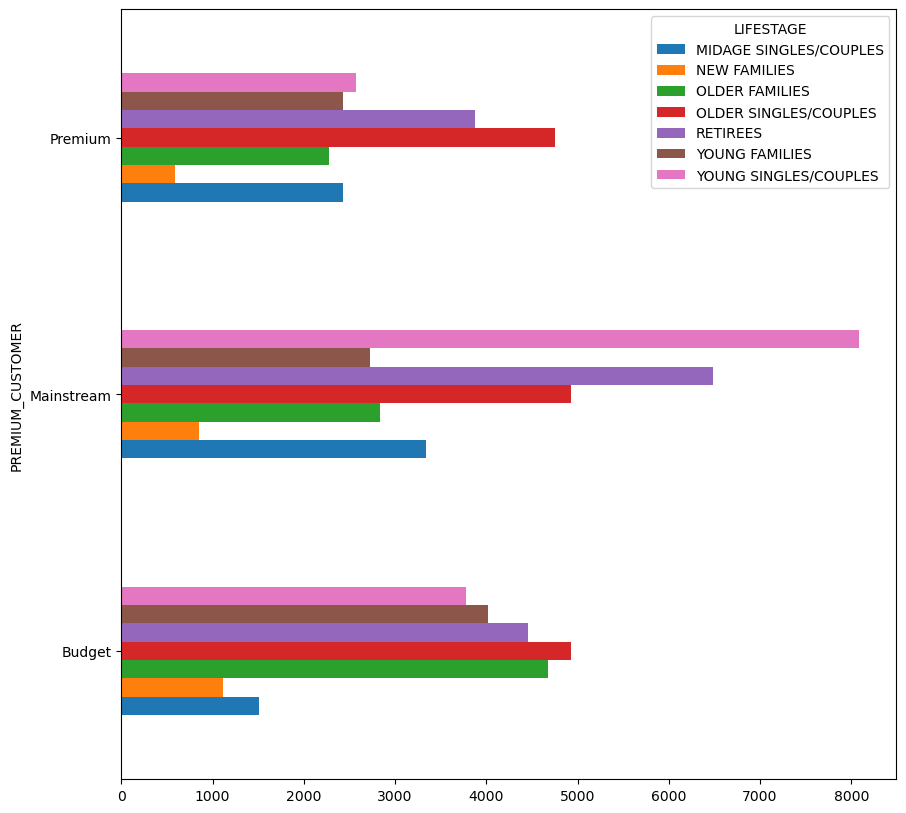

In [42]:
purchase_data.groupby(['PREMIUM_CUSTOMER', 'LIFESTAGE']).size().unstack().plot.barh(figsize=(10,10))

<Axes: ylabel='PREMIUM_CUSTOMER'>

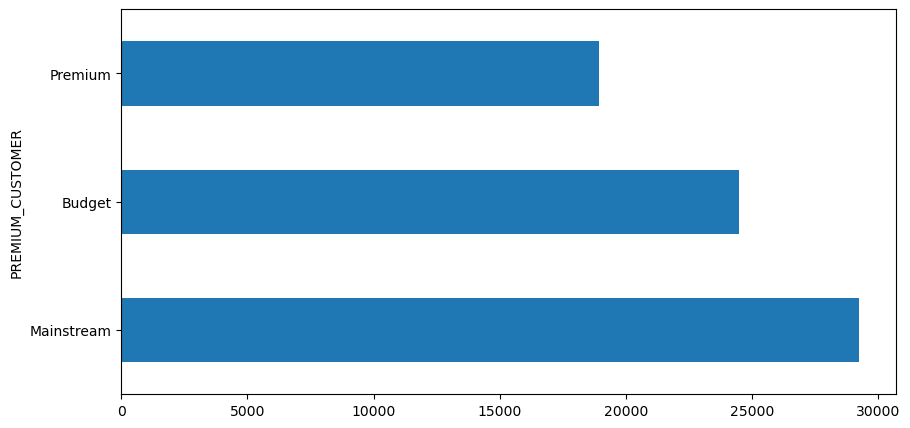

In [43]:
# check the distribution of the premium customers only
purchase_data['PREMIUM_CUSTOMER'].value_counts().plot.barh(figsize=(10,5))

Let's merge the datasets together so we have one unified dataframe to work with. We will specify that the purchase data will merge with the transaction data on the loyalty card number (matching column), and we'll perform a right join. This means that whatever the purchase dataset doesn't match up with the transaction data, that info will be gone. We only keep the data that matches the loyalty card number in the transaction data since it's the larger dataset.

In [44]:
merged_data = pd.merge(purchase_data, transaction_data, on="LYLTY_CARD_NBR", how="right")
merged_data.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,BRAND
0,1000,YOUNG SINGLES/COUPLES,Premium,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175,2,6.0,Natural Chip Co.
1,1307,MIDAGE SINGLES/COUPLES,Budget,2019-05-14,1,348,66,CCs Nacho Cheese 175,3,6.3,CCs
2,1343,MIDAGE SINGLES/COUPLES,Budget,2019-05-20,1,383,61,Smiths Crinkle Cut Chips Chicken 170,2,2.9,Smiths
3,2373,MIDAGE SINGLES/COUPLES,Budget,2018-08-17,2,974,69,Smiths Chip Thinly S/CreamOnion 175,5,15.0,Smiths
4,2426,MIDAGE SINGLES/COUPLES,Budget,2018-08-18,2,1038,108,Kettle Tortilla ChpsHnyJlpno Chili 150,3,13.8,Kettle


Double check there's no null values

In [45]:
merged_data.isnull().sum()

LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
DATE                0
STORE_NBR           0
TXN_ID              0
PROD_NBR            0
PROD_NAME           0
PROD_QTY            0
TOT_SALES           0
BRAND               0
dtype: int64

In [47]:
merged_data.to_csv("../data/merged_data.csv", index=False)

In [48]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246740 entries, 0 to 246739
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   LYLTY_CARD_NBR    246740 non-null  int64         
 1   LIFESTAGE         246740 non-null  object        
 2   PREMIUM_CUSTOMER  246740 non-null  object        
 3   DATE              246740 non-null  datetime64[ns]
 4   STORE_NBR         246740 non-null  int64         
 5   TXN_ID            246740 non-null  int64         
 6   PROD_NBR          246740 non-null  int64         
 7   PROD_NAME         246740 non-null  object        
 8   PROD_QTY          246740 non-null  int64         
 9   TOT_SALES         246740 non-null  float64       
 10  BRAND             246740 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(5), object(4)
memory usage: 20.7+ MB


What are some things that we might want to explore for the clients?

- Who spends the most on chips (total sales), describing customers by lifestage and how premium their general purchasing behaviour is
- How many customers are in each segment?
- How many chips are bought per customer by segment?
- What's the average chip price by customer segment?

We can answer the first two questions pretty easily by grouping the lifestage and customer segments together and aggregating on the sum of the total sales. To answer the second question we can just take away the plotting methods.

<Axes: ylabel='LIFESTAGE,PREMIUM_CUSTOMER'>

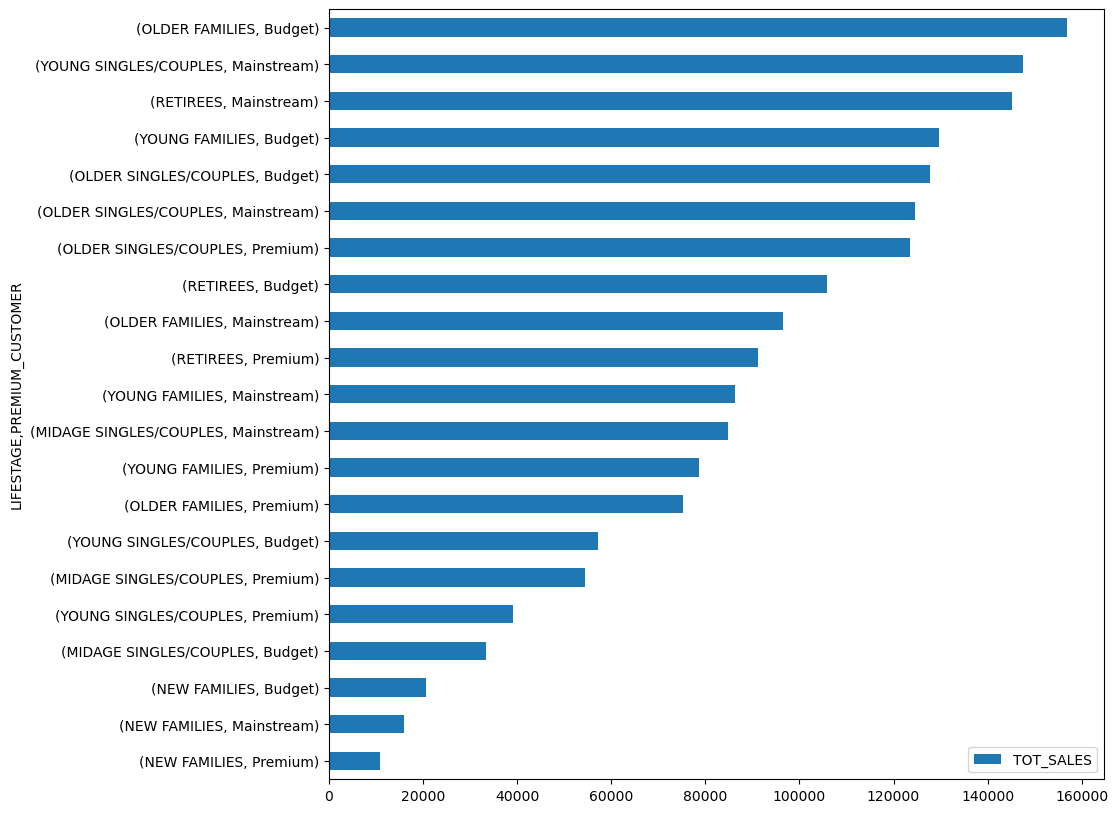

In [49]:
merged_data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']).agg({'TOT_SALES': 'sum'}).sort_values(by='TOT_SALES', ascending=True).plot.barh(figsize=(10,10))

In [50]:
merged_data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['TOT_SALES'].agg(['sum', 'mean']).sort_values(by='sum', ascending=True)

sum      mean
LIFESTAGE              PREMIUM_CUSTOMER                     
NEW FAMILIES           Premium            10760.80  7.231720
                       Mainstream         15979.70  7.313364
                       Budget             20607.45  7.297256
MIDAGE SINGLES/COUPLES Budget             33345.70  7.108442
YOUNG SINGLES/COUPLES  Premium            39052.30  6.673325
MIDAGE SINGLES/COUPLES Premium            54443.85  7.152371
YOUNG SINGLES/COUPLES  Budget             57122.10  6.663023
OLDER FAMILIES         Premium            75242.60  7.232779
YOUNG FAMILIES         Premium            78571.70  7.285951
MIDAGE SINGLES/COUPLES Mainstream         84734.25  7.637156
YOUNG FAMILIES         Mainstream         86338.25  7.226772
RETIREES               Premium            91296.65  7.461315
OLDER FAMILIES         Mainstream         96413.55  7.281440
RETIREES               Budget            105916.30  7.445786
OLDER SINGLES/COUPLES  Premium           123537.55  7.459997
                       Mainstream        124648.50  7.306049
                       Budget            127833.60  7.444305
YOUNG FAMILIES         Budget            129717.95  7.302705
RETIREES               Mainstream        145168.95  7.269352
YOUNG SINGLES/COUPLES  Mainstream        147582.20  7.551279
OLDER FAMILIES         Budget            156863.75  7.291241

Having a closer look in each group

In [51]:
grouped_sales = pd.DataFrame(merged_data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['TOT_SALES'].agg(['sum', 'mean']))
grouped_sales.sort_values(ascending=False, by="sum")

sum      mean
LIFESTAGE              PREMIUM_CUSTOMER                     
OLDER FAMILIES         Budget            156863.75  7.291241
YOUNG SINGLES/COUPLES  Mainstream        147582.20  7.551279
RETIREES               Mainstream        145168.95  7.269352
YOUNG FAMILIES         Budget            129717.95  7.302705
OLDER SINGLES/COUPLES  Budget            127833.60  7.444305
                       Mainstream        124648.50  7.306049
                       Premium           123537.55  7.459997
RETIREES               Budget            105916.30  7.445786
OLDER FAMILIES         Mainstream         96413.55  7.281440
RETIREES               Premium            91296.65  7.461315
YOUNG FAMILIES         Mainstream         86338.25  7.226772
MIDAGE SINGLES/COUPLES Mainstream         84734.25  7.637156
YOUNG FAMILIES         Premium            78571.70  7.285951
OLDER FAMILIES         Premium            75242.60  7.232779
YOUNG SINGLES/COUPLES  Budget             57122.10  6.663023
MIDAGE SINGLES/COUPLES Premium            54443.85  7.152371
YOUNG SINGLES/COUPLES  Premium            39052.30  6.673325
MIDAGE SINGLES/COUPLES Budget             33345.70  7.108442
NEW FAMILIES           Budget             20607.45  7.297256
                       Mainstream         15979.70  7.313364
                       Premium            10760.80  7.231720

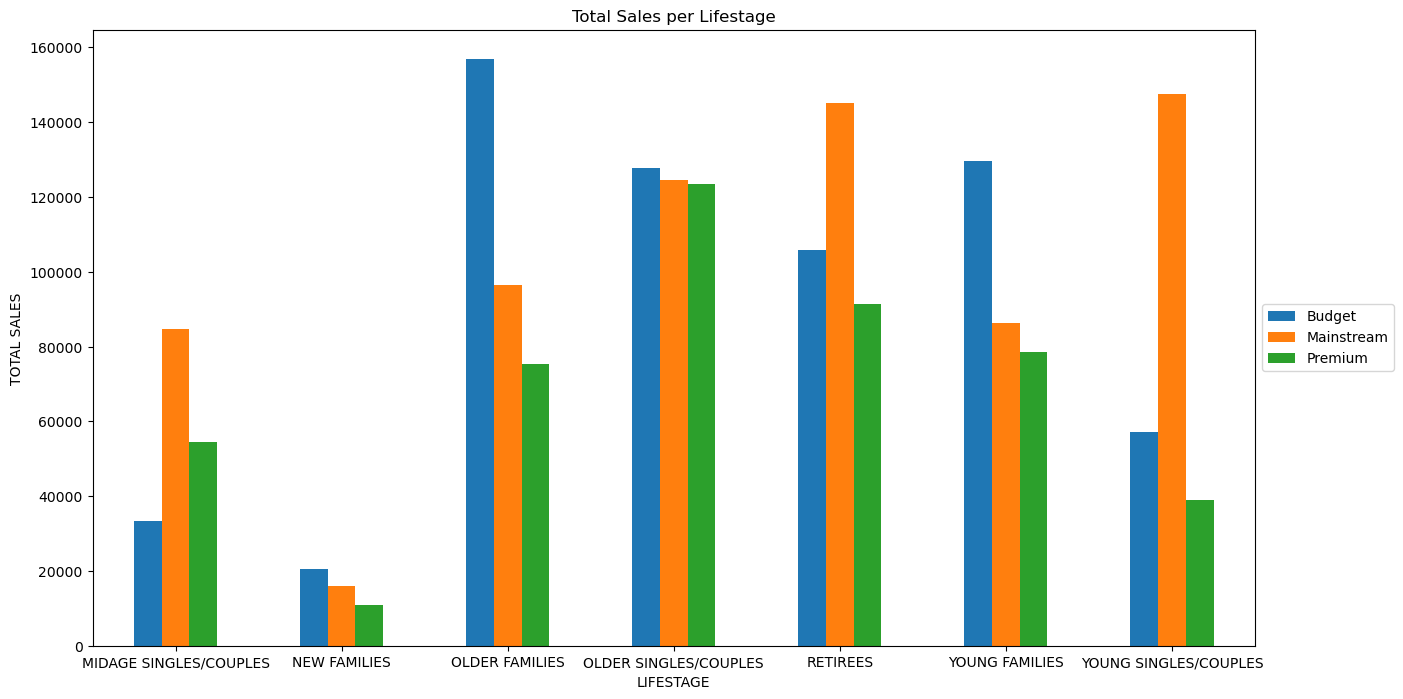

In [56]:
merged_data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['TOT_SALES'].agg('sum').unstack().plot.bar(figsize=(15,8))
plt.xticks(rotation=0)
plt.ylabel("TOTAL SALES")
plt.xlabel("LIFESTAGE")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.title("Total Sales per Lifestage")
plt.savefig("Total_Sales_per_Lifestage.png", bbox_inches="tight")
plt.show();

In [ ]:
stage_agg_prem = merged_data.groupby("LIFESTAGE")["PREMIUM_CUSTOMER"].agg(pd.Series.mode).sort_values()
print("Top contributor per LIFESTAGE by PREMIUM category")
print(stage_agg_prem)

Top contributor per LIFESTAGE by PREMIUM category
LIFESTAGE
NEW FAMILIES                  Budget
OLDER FAMILIES                Budget
OLDER SINGLES/COUPLES         Budget
YOUNG FAMILIES                Budget
MIDAGE SINGLES/COUPLES    Mainstream
RETIREES                  Mainstream
YOUNG SINGLES/COUPLES     Mainstream
Name: PREMIUM_CUSTOMER, dtype: object


The top 3 total sales contributor segments are:
- Older families (Budget) @ $156,864 total sales
- Young Singles/Couples (Mainstream) @ $147,582 total sales
- Retirees (Mainstream) @ $145,169 total sales

In [ ]:
# number of unique customers per lifestage/premium category
unique_cust = merged_data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['LYLTY_CARD_NBR'].nunique().sort_values(ascending=False)
unique_cust

LIFESTAGE               PREMIUM_CUSTOMER
YOUNG SINGLES/COUPLES   Mainstream          7917
RETIREES                Mainstream          6358
OLDER SINGLES/COUPLES   Mainstream          4858
                        Budget              4849
                        Premium             4682
OLDER FAMILIES          Budget              4611
RETIREES                Budget              4385
YOUNG FAMILIES          Budget              3953
RETIREES                Premium             3812
YOUNG SINGLES/COUPLES   Budget              3647
MIDAGE SINGLES/COUPLES  Mainstream          3298
OLDER FAMILIES          Mainstream          2788
YOUNG FAMILIES          Mainstream          2685
YOUNG SINGLES/COUPLES   Premium             2480
YOUNG FAMILIES          Premium             2398
MIDAGE SINGLES/COUPLES  Premium             2369
OLDER FAMILIES          Premium             2231
MIDAGE SINGLES/COUPLES  Budget              1474
NEW FAMILIES            Budget              1087
                        Main

<Axes: ylabel='LIFESTAGE,PREMIUM_CUSTOMER'>

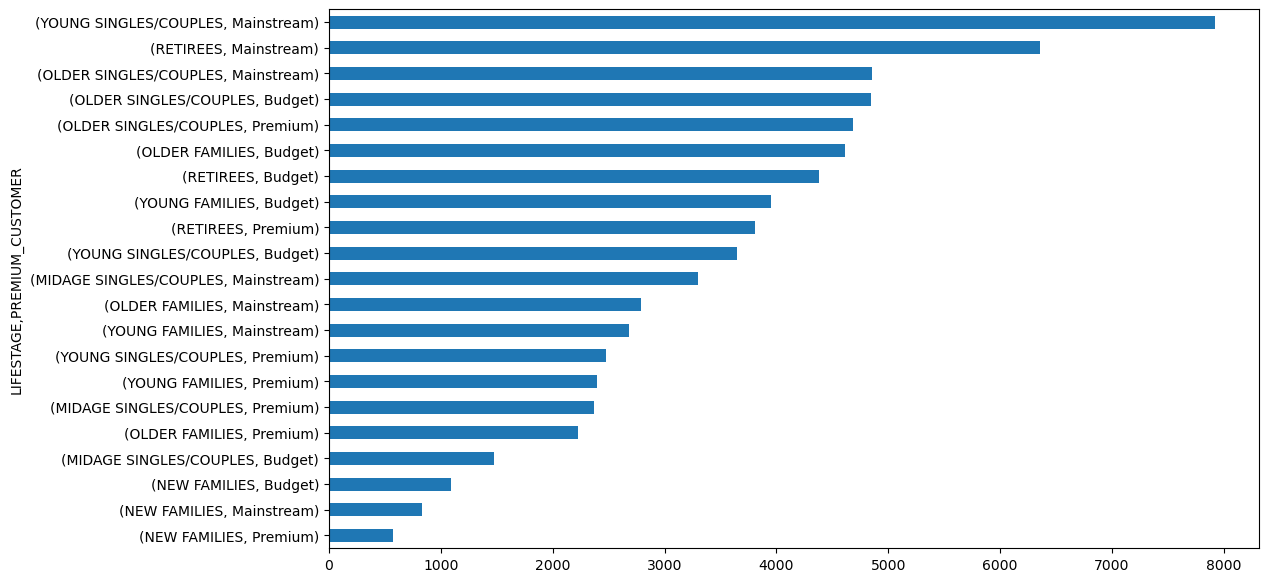

In [ ]:
unique_cust.sort_values().plot.barh(figsize=(12,7))

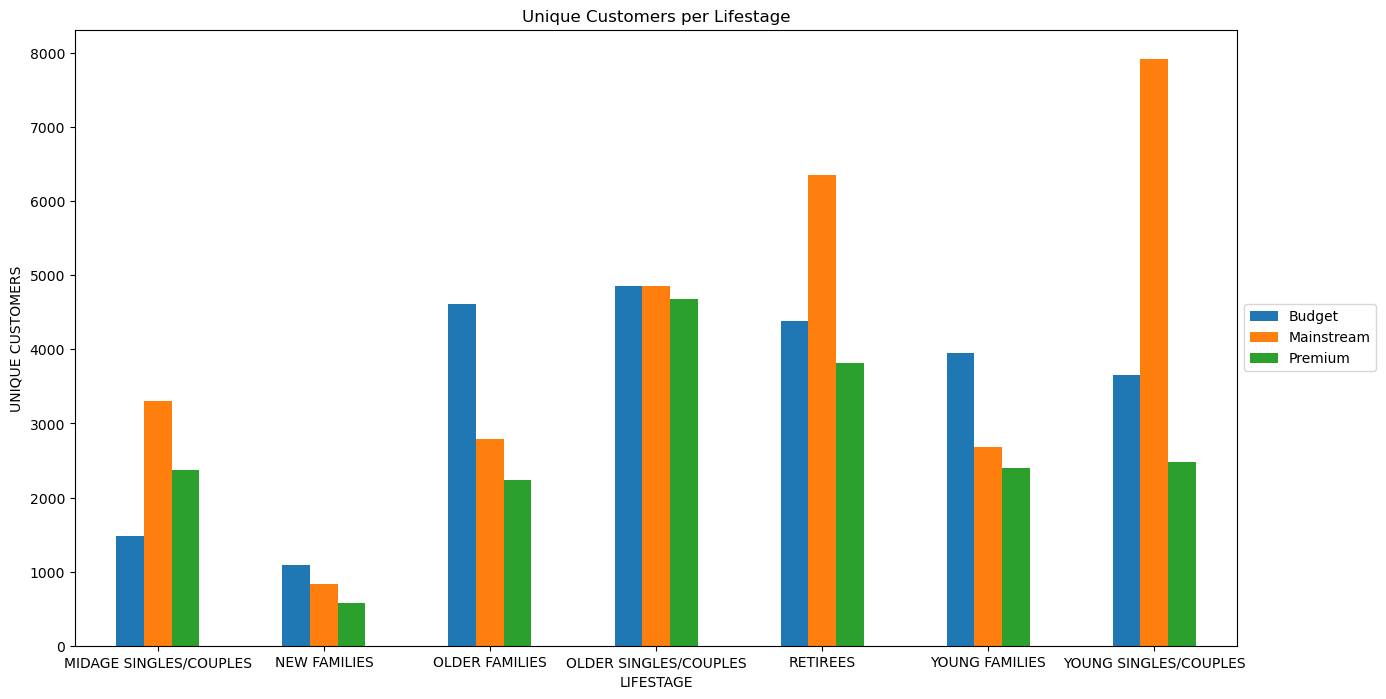

In [ ]:
unique_cust.unstack().plot.bar(figsize=(15,8))
plt.xticks(rotation=0)
plt.ylabel("UNIQUE CUSTOMERS")
plt.xlabel("LIFESTAGE")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.title("Unique Customers per Lifestage")
plt.show();

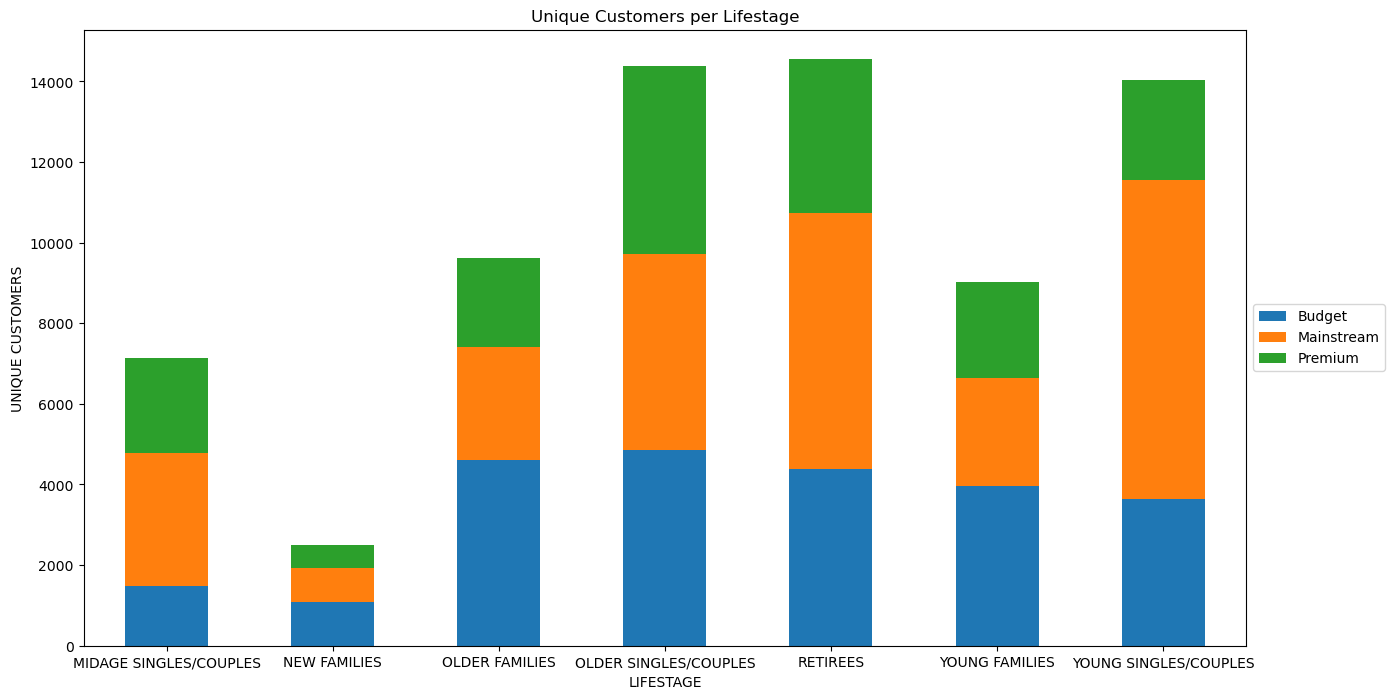

In [ ]:
unique_cust.unstack().plot.bar(stacked=True, figsize=(15,8))
plt.xticks(rotation=0)
plt.ylabel("UNIQUE CUSTOMERS")
plt.xlabel("LIFESTAGE")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.title("Unique Customers per Lifestage")
plt.show();

We can make an assumption that the high sales in the "Young Singles/Couples" and "Retirees" Mainstream segment is due to the large number of unique customers in these categories, but we don't have an answer for the "Older Families" Budget segment. We're going to explore that next. We'll see if the "Older Families" segment has:

- a high frequency of purchases, and
- average sales per customer compared to the other segments

In [ ]:
freq_per_cust = merged_data.groupby(["LYLTY_CARD_NBR", "LIFESTAGE", "PREMIUM_CUSTOMER"])["DATE"].count()
freq_per_cust.groupby(["LIFESTAGE", "PREMIUM_CUSTOMER"]).agg(["mean", "count"]).sort_values(ascending=False, by="mean")

mean  count
LIFESTAGE              PREMIUM_CUSTOMER                 
OLDER FAMILIES         Mainstream        4.749283   2788
                       Budget            4.665799   4611
                       Premium           4.662931   2231
YOUNG FAMILIES         Premium           4.497081   2398
                       Budget            4.493549   3953
                       Mainstream        4.449534   2685
OLDER SINGLES/COUPLES  Budget            3.541349   4849
                       Premium           3.536950   4682
                       Mainstream        3.511939   4858
MIDAGE SINGLES/COUPLES Mainstream        3.364160   3298
RETIREES               Budget            3.244014   4385
MIDAGE SINGLES/COUPLES Premium           3.213170   2369
RETIREES               Premium           3.209864   3812
MIDAGE SINGLES/COUPLES Budget            3.182497   1474
RETIREES               Mainstream        3.140925   6358
NEW FAMILIES           Mainstream        2.632530    830
                       Budget            2.597976   1087
                       Premium           2.587826    575
YOUNG SINGLES/COUPLES  Mainstream        2.468612   7917
                       Premium           2.359677   2480
                       Budget            2.350699   3647

This table above describes the average frequency of purchase per segment and the unique customer per segment. The top 3 most frequent purchases are attributed to the "Older Families" lifestage segment. We can now see the reason "Older Families" in the Budget category contribute to high sales because of a combination of high frequency of purchase and fairly high unique number of customers in the segment.

In [ ]:
grouped_sales.sort_values(ascending=False, by="mean")

,,sum,mean
LIFESTAGE,PREMIUM_CUSTOMER,,
MIDAGE SINGLES/COUPLES,Mainstream,84734.25,7.637156
YOUNG SINGLES/COUPLES,Mainstream,147582.20,7.551279
RETIREES,Premium,91296.65,7.461315
OLDER SINGLES/COUPLES,Premium,123537.55,7.459997
RETIREES,Budget,105916.30,7.445786
OLDER SINGLES/COUPLES,Budget,127833.60,7.444305
NEW FAMILIES,Mainstream,15979.70,7.313364
OLDER SINGLES/COUPLES,Mainstream,124648.50,7.306049
YOUNG FAMILIES,Budget,129717.95,7.302705


From the table above we can see the average price per unit sold is contributed to by the "Midage Singles/Couples" and "Young Singles/Couples" in the Mainstream category. The difference between their Mainstream and non-Mainstream componentmight seem insignificant (7.6 max vs 6.6-7.1 max), but we'll find out by examining the statistical significance.

In [ ]:
from scipy.stats import ttest_ind

In [ ]:
young_midage = ((merged_data["LIFESTAGE"] == "MIDAGE SINGLES/COUPLES") |
                (merged_data["LIFESTAGE"] == "YOUNG SINGLES/COUPLES"))

budget_premium = merged_data["PREMIUM_CUSTOMER"].isin(["Budget", "Premium"])

a = merged_data[(young_midage) & (merged_data["PREMIUM_CUSTOMER"] == "Mainstream")]["TOT_SALES"]
b = merged_data[(young_midage) & (budget_premium)]["TOT_SALES"]
stat, pval = ttest_ind(a.values, b.values, equal_var=False)
print("p-value: ", pval)
pval < 0.0000001

p-value:  1.834645908180742e-237


True

Our p-value seems to be pretty close to 0 so there is a statistically significant difference between the total sales of mainstream young/midage singles/couples and budget/premium young/midage singles/couples.

What chip brands do the top 3 segments buy that contribute to total sales?

========== YOUNG SINGLES/COUPLES Premium ==========
BRAND
Kettle     838
Smiths     787
Prinles    537
Name: count, dtype: int64


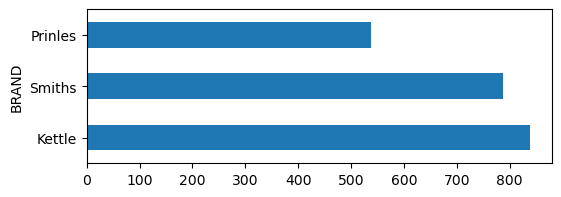

========== YOUNG SINGLES/COUPLES Budget ==========
BRAND
Kettle     1211
Smiths     1185
Prinles     832
Name: count, dtype: int64


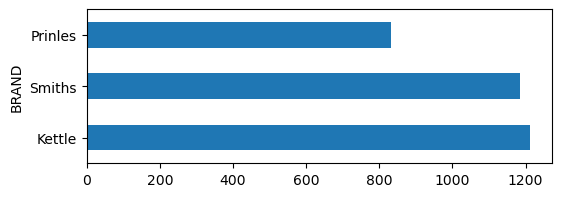

========== YOUNG SINGLES/COUPLES Mainstream ==========
BRAND
Kettle     3844
Doritos    2379
Prinles    2315
Name: count, dtype: int64


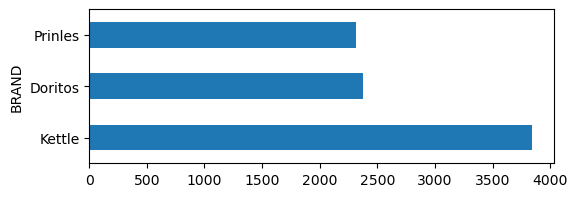

========== MIDAGE SINGLES/COUPLES Premium ==========
BRAND
Kettle     1206
Smiths      923
Prinles     781
Name: count, dtype: int64


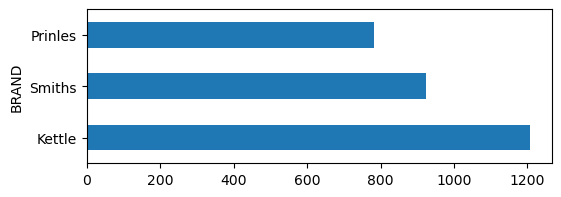

========== MIDAGE SINGLES/COUPLES Budget ==========
BRAND
Kettle     713
Smiths     591
Doritos    479
Name: count, dtype: int64


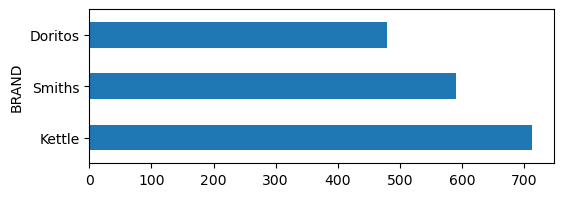

========== MIDAGE SINGLES/COUPLES Mainstream ==========
BRAND
Kettle     2136
Smiths     1276
Doritos    1210
Name: count, dtype: int64


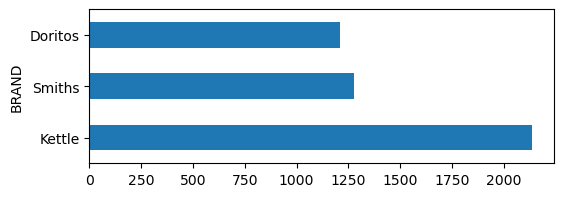

========== NEW FAMILIES Premium ==========
BRAND
Kettle     247
Prinles    165
Smiths     155
Name: count, dtype: int64


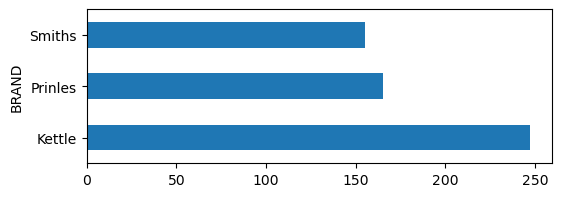

========== NEW FAMILIES Budget ==========
BRAND
Kettle     510
Smiths     328
Doritos    315
Name: count, dtype: int64


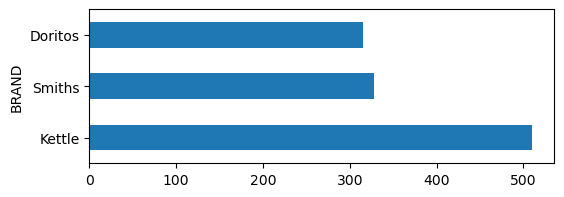

========== NEW FAMILIES Mainstream ==========
BRAND
Kettle     414
Doritos    257
Smiths     244
Name: count, dtype: int64


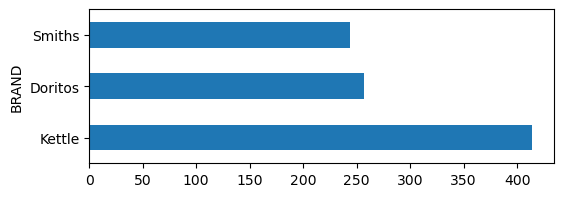

========== OLDER FAMILIES Premium ==========
BRAND
Kettle     1512
Smiths     1448
Prinles    1014
Name: count, dtype: int64


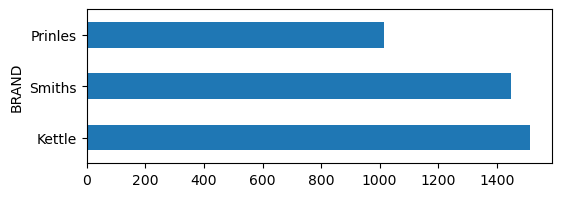

========== OLDER FAMILIES Budget ==========
BRAND
Kettle     3320
Smiths     2948
Doritos    2032
Name: count, dtype: int64


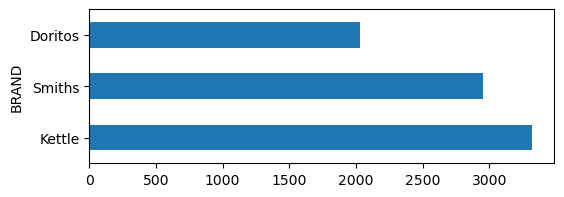

========== OLDER FAMILIES Mainstream ==========
BRAND
Kettle     2019
Smiths     1742
Doritos    1263
Name: count, dtype: int64


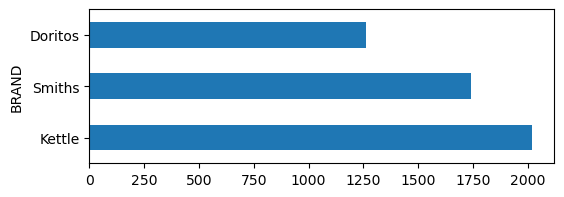

========== OLDER SINGLES/COUPLES Premium ==========
BRAND
Kettle     2947
Smiths     1952
Doritos    1784
Name: count, dtype: int64


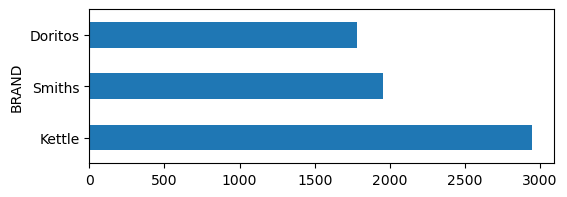

========== OLDER SINGLES/COUPLES Budget ==========
BRAND
Kettle     3065
Smiths     2010
Prinles    1843
Name: count, dtype: int64


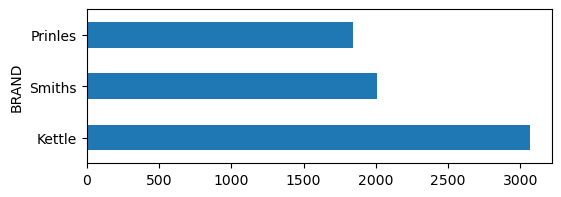

========== OLDER SINGLES/COUPLES Mainstream ==========
BRAND
Kettle     2835
Smiths     2070
Doritos    1791
Name: count, dtype: int64


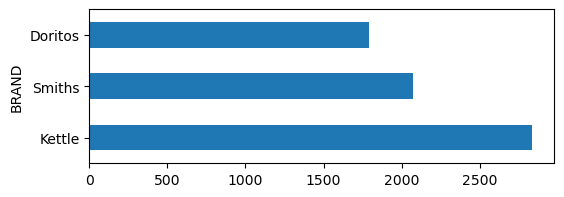

========== RETIREES Premium ==========
BRAND
Kettle     2216
Smiths     1395
Prinles    1331
Name: count, dtype: int64


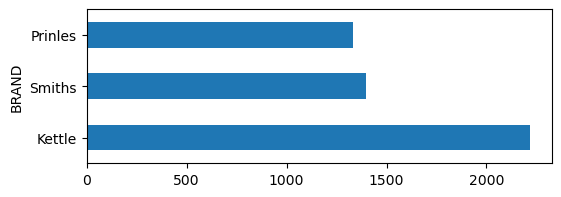

========== RETIREES Budget ==========
BRAND
Kettle     2592
Smiths     1612
Doritos    1592
Name: count, dtype: int64


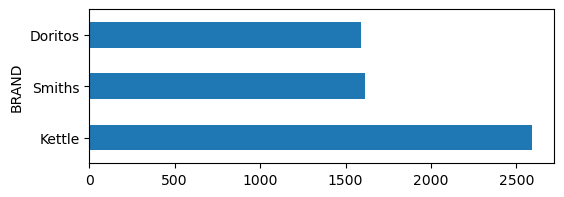

========== RETIREES Mainstream ==========
BRAND
Kettle     3386
Smiths     2367
Prinles    2103
Name: count, dtype: int64


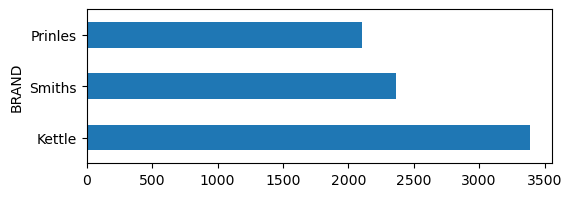

========== YOUNG FAMILIES Premium ==========
BRAND
Kettle     1745
Smiths     1384
Prinles    1007
Name: count, dtype: int64


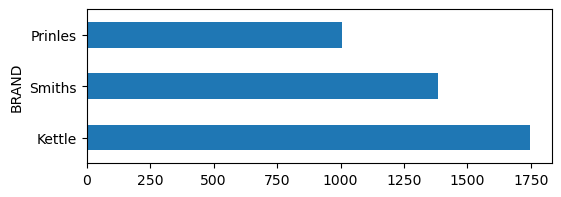

========== YOUNG FAMILIES Budget ==========
BRAND
Kettle     2743
Smiths     2334
Doritos    1767
Name: count, dtype: int64


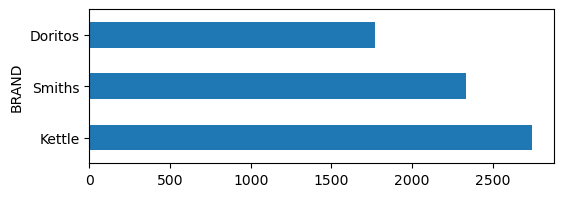

========== YOUNG FAMILIES Mainstream ==========
BRAND
Kettle     1789
Smiths     1681
Prinles    1148
Name: count, dtype: int64


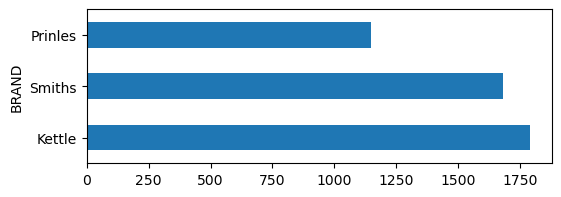

In [ ]:
for stage in merged_data['LIFESTAGE'].unique():
    for prem in merged_data['PREMIUM_CUSTOMER'].unique():
        print("==========", stage, prem, "==========")
        summary = merged_data[(merged_data["LIFESTAGE"] == stage) & (merged_data["PREMIUM_CUSTOMER"] == prem)]['BRAND'].value_counts().head(3)
        print(summary)
        plt.figure()
        summary.plot.barh(figsize=(6,2))
        plt.show()

Every single segment has Kettle as the most purchased brand. Also, every segment except for "YOUNG SINGLES/COUPLES Mainstream", "NEW FAMILIES Mainstream", and "NEW FAMILIES Premium" had Smiths as their second most purchased brand. "YOUNG SINGLES/COUPLES Mainstream" and "NEW FAMILIES Mainstream" had Doritos as their second most purchased brand, and "NEW FAMILIES Premium" had Pringles as their second most purchased brand.

Next we'll perform an Apriori analysis and association rules. What this is, is an algorithmic tenchique to calculate rules to express probabilistic relationships between items in frequent itemsets

In [ ]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

temp = merged_data.reset_index().rename(columns={'index': 'transaction'})
temp["Segment"] = temp["LIFESTAGE"] + "-" + temp["PREMIUM_CUSTOMER"]
segment_brand_encode = pd.concat([pd.get_dummies(temp["Segment"]), pd.get_dummies(temp["BRAND"])], axis=1)

In [ ]:
frequent_sets = apriori(segment_brand_encode, min_support=0.01, use_colnames=True)
rules = association_rules(frequent_sets, metric="lift", min_threshold=1)

In [ ]:
set_temp = temp["Segment"].unique()
rules[rules["antecedents"].apply(lambda x: list(x)).apply(lambda x: x in set_temp)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
1,(OLDER FAMILIES-Budget),(Smiths),0.087193,0.123016,0.011948,0.137027,1.113895,0.001222,1.016236,0.112016
3,(OLDER SINGLES/COUPLES-Budget),(Kettle),0.069596,0.167334,0.012422,0.178488,1.066658,0.000776,1.013578,0.067167
4,(OLDER SINGLES/COUPLES-Premium),(Kettle),0.067115,0.167334,0.011944,0.177959,1.063495,0.000713,1.012925,0.064000
7,(RETIREES-Budget),(Kettle),0.057652,0.167334,0.010505,0.182214,1.088926,0.000858,1.018196,0.086660
8,(RETIREES-Mainstream),(Kettle),0.080935,0.167334,0.013723,0.169554,1.013269,0.000180,1.002674,0.014248
10,(YOUNG SINGLES/COUPLES-Mainstream),(Kettle),0.079209,0.167334,0.015579,0.196684,1.175400,0.002325,1.036537,0.162062


Having a look at our apriori analysis, we can make the conclusion that Kettle is the chip brand of choice for most segments (not surprising).

What are the most purchased pack sizes?

========== YOUNG SINGLES/COUPLES Premium ==========
Pack_Size
175.0    1396
150.0     880
134.0     653
Name: count, dtype: int64


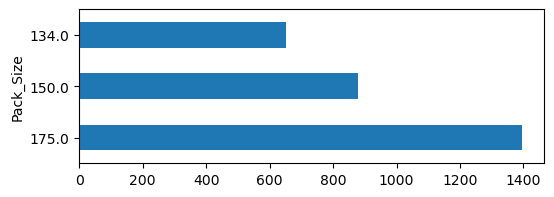

========== YOUNG SINGLES/COUPLES Budget ==========
Pack_Size
175.0    2174
150.0    1319
134.0     737
Name: count, dtype: int64


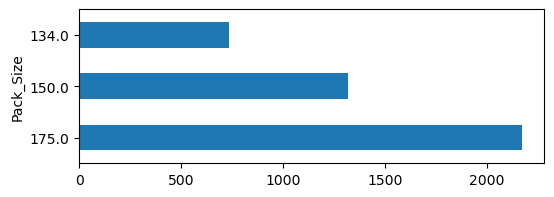

========== YOUNG SINGLES/COUPLES Mainstream ==========
Pack_Size
175.0    4975
150.0    2974
134.0    1807
Name: count, dtype: int64


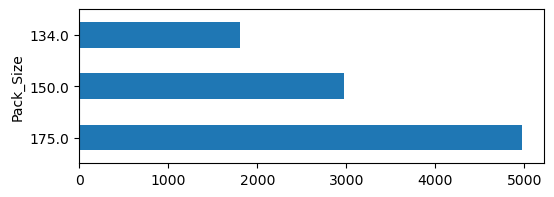

========== MIDAGE SINGLES/COUPLES Premium ==========
Pack_Size
175.0    1906
150.0    1100
134.0     735
Name: count, dtype: int64


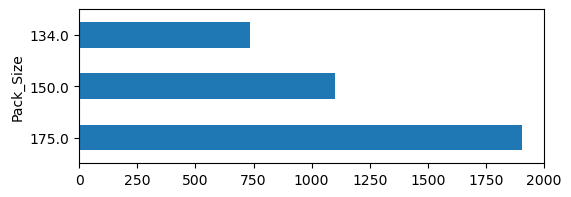

========== MIDAGE SINGLES/COUPLES Budget ==========
Pack_Size
175.0    1189
150.0     728
134.0     423
Name: count, dtype: int64


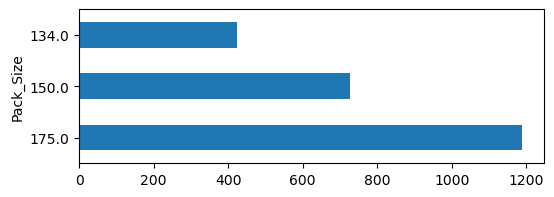

========== MIDAGE SINGLES/COUPLES Mainstream ==========
Pack_Size
175.0    2793
150.0    1666
134.0    1079
Name: count, dtype: int64


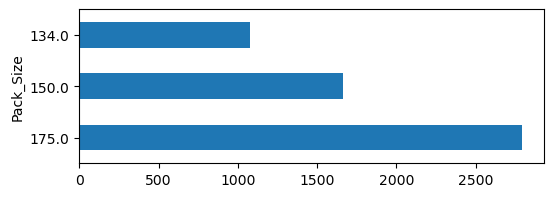

========== NEW FAMILIES Premium ==========
Pack_Size
175.0    373
150.0    241
134.0    142
Name: count, dtype: int64


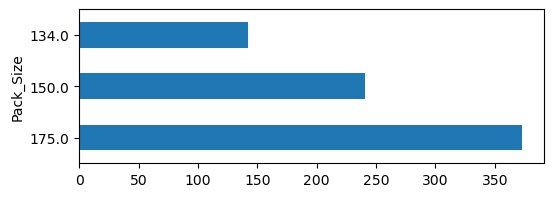

========== NEW FAMILIES Budget ==========
Pack_Size
175.0    733
150.0    432
134.0    268
Name: count, dtype: int64


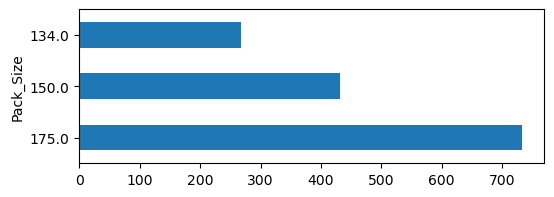

========== NEW FAMILIES Mainstream ==========
Pack_Size
175.0    571
150.0    315
110.0    218
Name: count, dtype: int64


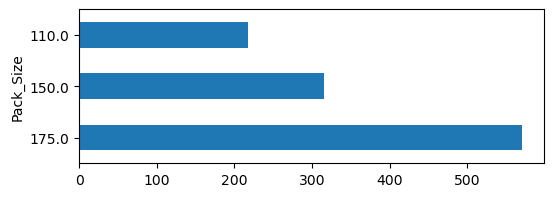

========== OLDER FAMILIES Premium ==========
Pack_Size
175.0    2636
150.0    1577
134.0     937
Name: count, dtype: int64


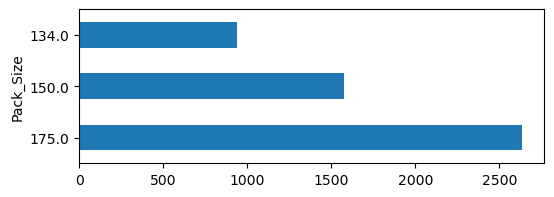

========== OLDER FAMILIES Budget ==========
Pack_Size
175.0    5349
150.0    3305
134.0    1894
Name: count, dtype: int64


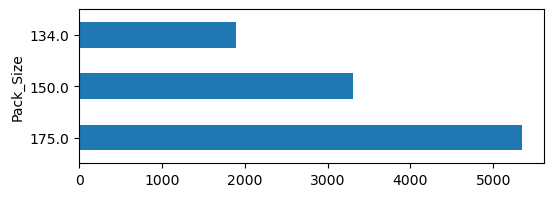

========== OLDER FAMILIES Mainstream ==========
Pack_Size
175.0    3337
150.0    2039
134.0    1116
Name: count, dtype: int64


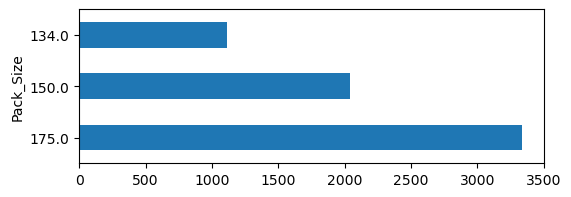

========== OLDER SINGLES/COUPLES Premium ==========
Pack_Size
175.0    4128
150.0    2578
134.0    1588
Name: count, dtype: int64


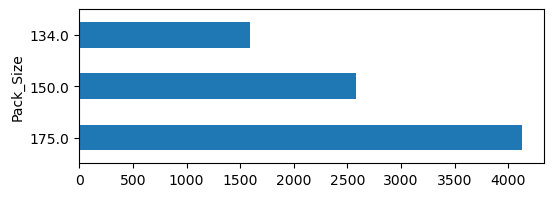

========== OLDER SINGLES/COUPLES Budget ==========
Pack_Size
175.0    4325
150.0    2660
134.0    1677
Name: count, dtype: int64


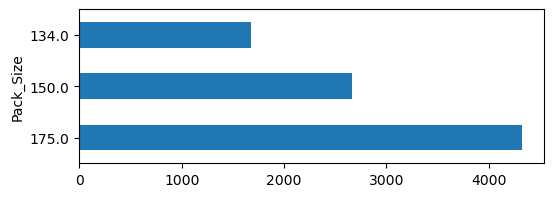

========== OLDER SINGLES/COUPLES Mainstream ==========
Pack_Size
175.0    4210
150.0    2534
134.0    1645
Name: count, dtype: int64


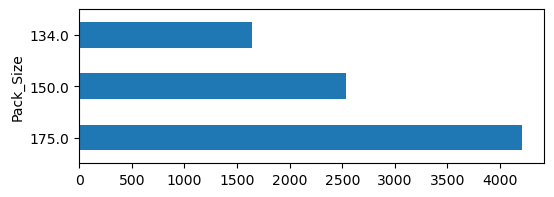

========== RETIREES Premium ==========
Pack_Size
175.0    3052
150.0    1862
134.0    1202
Name: count, dtype: int64


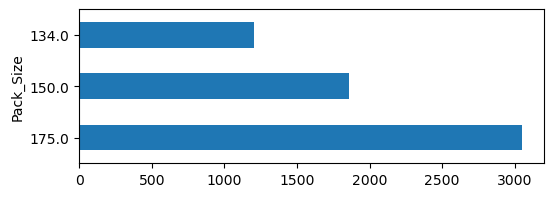

========== RETIREES Budget ==========
Pack_Size
175.0    3605
150.0    2198
134.0    1436
Name: count, dtype: int64


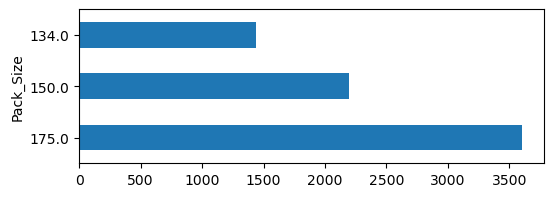

========== RETIREES Mainstream ==========
Pack_Size
175.0    4955
150.0    3055
134.0    1962
Name: count, dtype: int64


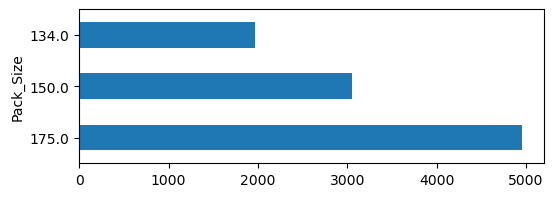

========== YOUNG FAMILIES Premium ==========
Pack_Size
175.0    2683
150.0    1662
134.0     984
Name: count, dtype: int64


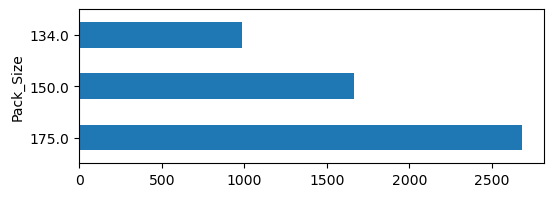

========== YOUNG FAMILIES Budget ==========
Pack_Size
175.0    4546
150.0    2599
134.0    1722
Name: count, dtype: int64


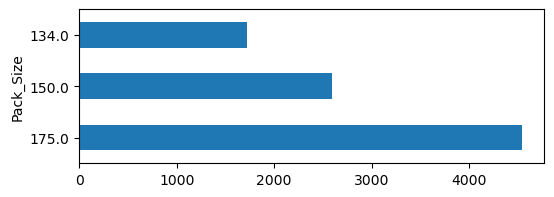

========== YOUNG FAMILIES Mainstream ==========
Pack_Size
175.0    3031
150.0    1832
134.0    1032
Name: count, dtype: int64


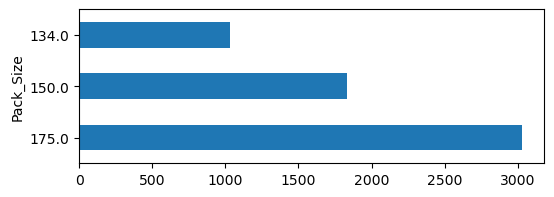

In [ ]:
merged_pack = pd.concat([merged_data, pack_sizes.rename("Pack_Size")], axis=1)

for stage in merged_data["LIFESTAGE"].unique():
    for prem in merged_data["PREMIUM_CUSTOMER"].unique():
        print("==========", stage, prem, "==========")
        summary = merged_pack[(merged_pack["LIFESTAGE"] == stage) & (merged_pack["PREMIUM_CUSTOMER"] == prem)]["Pack_Size"].value_counts().head(3)
        print(summary)
        plt.figure()
        summary.plot.barh(figsize=(6,2))
        plt.show()

It's pretty clear that all of the segments prefer the largest pack size, 175g.

What is the average amount of chips bought per customer segment?

In [ ]:
(temp.groupby(["LIFESTAGE", "PREMIUM_CUSTOMER"])["PROD_QTY"].sum() / temp.groupby(["LIFESTAGE", "PREMIUM_CUSTOMER"])["LYLTY_CARD_NBR"].nunique()).sort_values(ascending=False)

LIFESTAGE               PREMIUM_CUSTOMER
OLDER FAMILIES          Mainstream          9.255380
                        Budget              9.076773
                        Premium             9.071717
YOUNG FAMILIES          Budget              8.722995
                        Premium             8.716013
                        Mainstream          8.638361
OLDER SINGLES/COUPLES   Budget              6.781398
                        Premium             6.769543
                        Mainstream          6.712021
MIDAGE SINGLES/COUPLES  Mainstream          6.432080
RETIREES                Budget              6.141847
                        Premium             6.103358
MIDAGE SINGLES/COUPLES  Premium             6.078514
                        Budget              6.026459
RETIREES                Mainstream          5.925920
NEW FAMILIES            Mainstream          4.891566
                        Budget              4.821527
                        Premium             4.815652
YOUNG

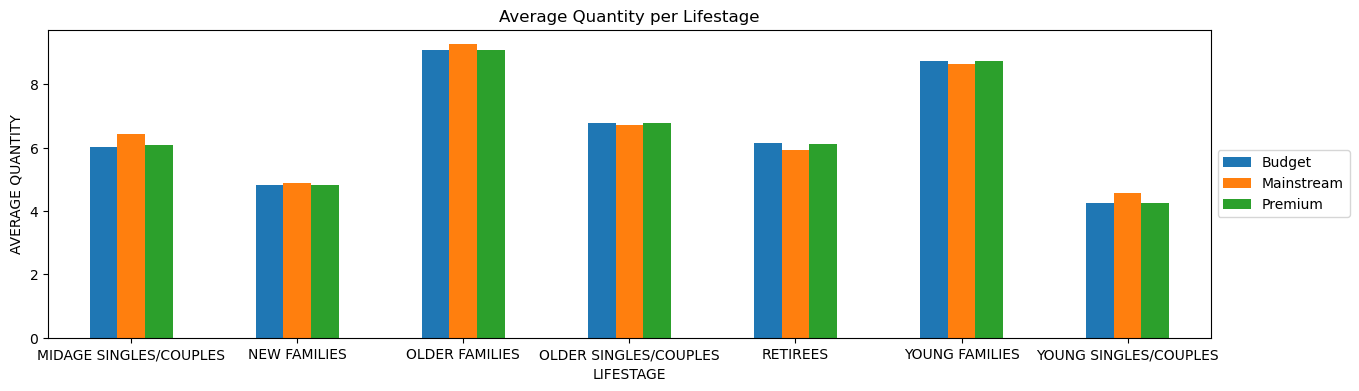

In [ ]:
(temp.groupby(["LIFESTAGE", "PREMIUM_CUSTOMER"])["PROD_QTY"].sum() / temp.groupby(["LIFESTAGE", "PREMIUM_CUSTOMER"])["LYLTY_CARD_NBR"].nunique()).unstack().plot.bar(figsize=(15,4), rot=0)

plt.ylabel("AVERAGE QUANTITY")
plt.xlabel("LIFESTAGE")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.title("Average Quantity per Lifestage")
plt.savefig("Average Quantity per Lifestage.png", bbox_inches='tight')
plt.show();

In [ ]:
temp["Unit Price"] = temp["TOT_SALES"] / temp["PROD_QTY"]
temp.groupby(["Segment"])["Unit Price"].mean().sort_values(ascending=False)

Segment
YOUNG SINGLES/COUPLES-Mainstream     4.065642
MIDAGE SINGLES/COUPLES-Mainstream    3.994241
RETIREES-Budget                      3.924404
RETIREES-Premium                     3.920942
NEW FAMILIES-Budget                  3.917688
NEW FAMILIES-Mainstream              3.916133
OLDER SINGLES/COUPLES-Premium        3.893182
OLDER SINGLES/COUPLES-Budget         3.882096
NEW FAMILIES-Premium                 3.872110
RETIREES-Mainstream                  3.844294
OLDER SINGLES/COUPLES-Mainstream     3.814665
MIDAGE SINGLES/COUPLES-Premium       3.770698
YOUNG FAMILIES-Premium               3.762150
YOUNG FAMILIES-Budget                3.760737
OLDER FAMILIES-Budget                3.745340
MIDAGE SINGLES/COUPLES-Budget        3.743328
OLDER FAMILIES-Mainstream            3.737077
YOUNG FAMILIES-Mainstream            3.724533
OLDER FAMILIES-Premium               3.717000
YOUNG SINGLES/COUPLES-Premium        3.665414
YOUNG SINGLES/COUPLES-Budget         3.657366
Name: Unit Price, dtype: f

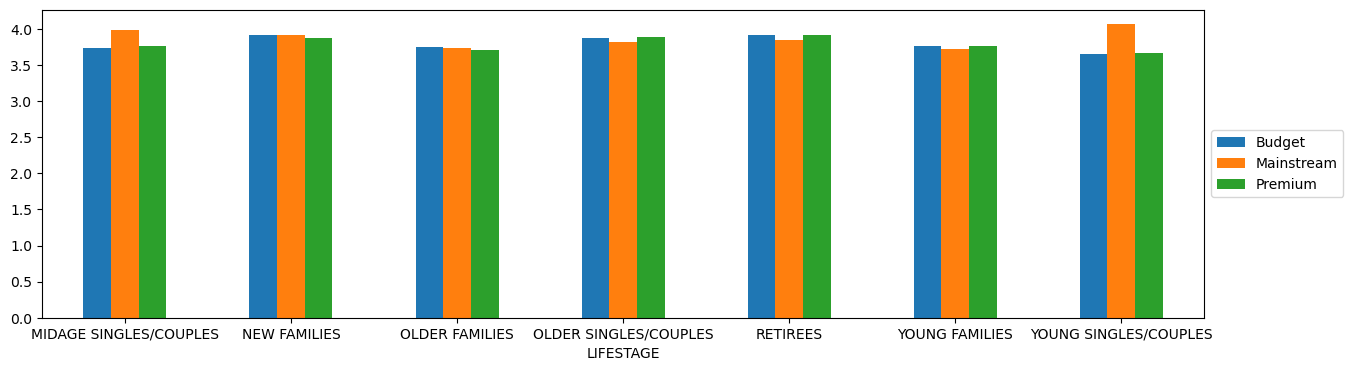

In [ ]:
temp.groupby(["LIFESTAGE", "PREMIUM_CUSTOMER"])["Unit Price"].mean().unstack().plot.bar(figsize=(15,4), rot=0)
plt.legend(loc="center left", bbox_to_anchor=(1.0, 0.5))

In [ ]:
temp.head()

,transaction,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,BRAND,Segment,Unit Price
0,0,1000,YOUNG SINGLES/COUPLES,Premium,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175,2,6.0,Natural Chip Co.,YOUNG SINGLES/COUPLES-Premium,3.00
1,1,1307,MIDAGE SINGLES/COUPLES,Budget,2019-05-14,1,348,66,CCs Nacho Cheese 175,3,6.3,CCs,MIDAGE SINGLES/COUPLES-Budget,2.10
2,2,1343,MIDAGE SINGLES/COUPLES,Budget,2019-05-20,1,383,61,Smiths Crinkle Cut Chips Chicken 170,2,2.9,Smiths,MIDAGE SINGLES/COUPLES-Budget,1.45
3,3,2373,MIDAGE SINGLES/COUPLES,Budget,2018-08-17,2,974,69,Smiths Chip Thinly S/CreamOnion 175,5,15.0,Smiths,MIDAGE SINGLES/COUPLES-Budget,3.00
4,4,2426,MIDAGE SINGLES/COUPLES,Budget,2018-08-18,2,1038,108,Kettle Tortilla ChpsHnyJlpno Chili 150,3,13.8,Kettle,MIDAGE SINGLES/COUPLES-Budget,4.60


In [ ]:
z = temp.groupby(["Segment", "BRAND"])["TOT_SALES"].sum().sort_values(ascending=False)

In [ ]:
# top brands for young singles/couples
z["YOUNG SINGLES/COUPLES-Mainstream"].head(10)

BRAND
Kettle       35423.6
Doritos      20925.9
Prinles      16006.2
Smiths       14958.9
Infuzions     8749.4
Twisties      7539.8
Tostitos      7238.0
Thins         7217.1
Cobs          6144.6
Tyrrells      4800.6
Name: TOT_SALES, dtype: float64

## Insights

- The top 3 sales contributor segments are:
    - Older families (Budget) @ $156,864
    - Young Single/Couples (Mainstream) @ $147,582
    - Retirees (Mainstream) @ $145,169


- Young Singles/Couples (Mainstream) have the highest population, followed by Retirees (Mainstream). This explains their high total sales
- Despite Older Families not having the highest population, they have the highest frequency of purchases, which contributes to their high total sales
- Older Families, followed by Young Families, have the highest average quantity of chips brought per purchase
- The Mainstream category of "Young and Midage Singles/Couples" have the highest spending of chips per purchase. The difference to the non-Mainstream "Young and Midage Singles/Couples" are statistically significant
- The chip brand "Kettle" is dominating almost every segment as the most purchased brand
- The second most purchased brand, with a few exceptions is "Smiths". The exceptions are "Doritos" being the second most purchased brand for "Young Singles/Couples" and "New Families - Mainstream", while Pringles are the second most purchased brand for "New Families - Premium"
- The most fequent chip bag size purchased is 175g followed by 150g for all segments


## Recommendations

- Older Families
    - Focus on the Budget segment
    - Strength: Frequent purchases - We can give promotions that encourage more frequent purchases
    - Strength: High quantity of chips purchased per visit. We can run promotions that encourage them to buy a higher quantity of chips per purchase (e.g. a 3 for $10)
- Young Singles/Couples
    - Focus on the Mainstream segment
    - This segment is only one of two that had Doritos as their 2nd most purchased brand. To specifically target this segment, it might be a good idea to collaborate with Doritos merchant to do some branding promotion catered to "Younf Singles/Couples - Mainstream" segment
    - Strength: Population quantity - We can spend more effort on making sure our promotions reach them and that it reaches them frequently
- Retirees
    - Focus on the Mainstream segment as well
    - Strength: Population quantity - Again, since their population quantity is one of the main contributors to the high sales total, we should spend more effort on making sure our promotions reach as many of the population as possible and frequently
- General
    - Almost all segments had "Kettle" as the most frequently purchased brand and 175g chip bag size as the preferred bag size
    - When promoting chips in general to all segments it is a good idea to take advantage of these top two insights